<a href="https://colab.research.google.com/github/jomscan/CEIABDTA/blob/main/Actividad_3_6_DengAI_predicci%C3%B3n_de_la_propagaci%C3%B3n_de_enfermedades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonathan Martin Sanchez


1.Utilizar el drive o GitHub como origen de ficheros para la importación del dataset.

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Especificar la ruta del archivo en Drive
file_path_train = '/content/drive/My Drive/Competicion/dengue.csv'
file_path_test = '/content/drive/My Drive/Competicion/dengue_features_test.csv'

# Cargar el dataset en un DataFrame de Pandas
dengue_train = pd.read_csv(file_path_train)  # Usa pd.read_excel(file_path) si es un archivo .xlsx
dengue_test = pd.read_csv(file_path_test)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.Importación del dataset: Preparación de los datos: Normaliza, ajusta la calidad de los datos.

In [ ]:
# Convertir la columna 'week_start_date' a datetime
dengue_train['week_start_date'] = pd.to_datetime(dengue_train['week_start_date'])
dengue_test['week_start_date'] = pd.to_datetime(dengue_test['week_start_date'])


# Revisar la cantidad de valores nulos en cada columna
print("Valores nulos por columna:")
print(dengue_train.isnull().sum())

# Opciones de imputación:
# Ejemplo 1: Imputar valores faltantes con la media para columnas numéricas
#numeric_cols = dengue_train.select_dtypes(include=[np.number]).columns.tolist()
#dengue_train[numeric_cols] = dengue_train[numeric_cols].fillna(dengue_train[numeric_cols].mean())

# Opcionalmente, si prefieres la mediana:
#dengue_train[numeric_cols] = dengue_train[numeric_cols].fillna(dengue_train[numeric_cols].median())

# También puedes optar por otros métodos (por ejemplo, forward fill) si consideras que es adecuado para series temporales:
dengue_train.sort_values(by='week_start_date', inplace=True)
dengue_train.fillna(method='ffill', inplace=True)

# Revisar nuevamente para confirmar que se imputaron los valores
print("Después de la imputación:")
print(dengue_train.isnull().sum())

# Puedes extraer características adicionales de la fecha, por ejemplo, el mes:
dengue_train['month'] = dengue_train['week_start_date'].dt.month
dengue_test['month'] = dengue_test['week_start_date'].dt.month




Valores nulos por columna:
city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c          

<ipython-input-2-d1e2b48e47e9>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dengue_train.fillna(method='ffill', inplace=True)


3.Selección de características: Utiliza métodos no gráficos para la selección de características.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression


# Supongamos que 'df' es tu DataFrame y que la variable objetivo es 'total_cases'
X = dengue_train.drop(['city', 'year', 'weekofyear', 'total_cases', 'week_start_date'], axis=1)
y = dengue_train['total_cases']

# Aplicar SelectKBest para obtener el score de todas las variables
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit_transform(X, y)

# Crear un DataFrame con los scores obtenidos
scores_df = pd.DataFrame({
    'Característica': X.columns,
    'Puntuación': selector.scores_
}).sort_values(by='Puntuación', ascending=False)

print("Puntuaciones de las características:")
print(scores_df)


Puntuaciones de las características:
                           Característica  Puntuación
9               reanalysis_min_air_temp_k  172.069275
14                      reanalysis_tdtr_k  122.928590
18                     station_min_temp_c  108.752145
5                   reanalysis_air_temp_k  108.463160
16                station_diur_temp_rng_c   81.693861
20                                  month   70.976195
2                                 ndvi_se   69.344230
0                                 ndvi_ne   62.660652
8               reanalysis_max_air_temp_k   55.952244
1                                 ndvi_nw   42.998227
6                   reanalysis_avg_temp_k   33.256170
3                                 ndvi_sw   31.158344
7             reanalysis_dew_point_temp_k   28.750994
11   reanalysis_relative_humidity_percent   26.915275
13  reanalysis_specific_humidity_g_per_kg   23.674755
15                     station_avg_temp_c   17.713439
19                      station_precip_mm    

In [ ]:
# Se crea variable para manejar el filtro de las variables que se van a seleccionar
filtro = 10.0

# Filtrar las características cuya puntuación se ha asignado
filtered_features = scores_df[scores_df['Puntuación'] > filtro]

# Obtener el listado de columnas seleccionadas
selected_features = filtered_features['Característica']
featuresSelectKBest = selected_features.tolist()

print("Características seleccionadas con SelectKBest (puntuación > filtro):", featuresSelectKBest)

Características seleccionadas con SelectKBest (puntuación > filtro): ['reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'station_min_temp_c', 'reanalysis_air_temp_k', 'station_diur_temp_rng_c', 'month', 'ndvi_se', 'ndvi_ne', 'reanalysis_max_air_temp_k', 'ndvi_nw', 'reanalysis_avg_temp_k', 'ndvi_sw', 'reanalysis_dew_point_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c']


Recomendación práctica para un problema de predicción de dengue (regresión):

En muchos estudios epidemiológicos y de salud, los datos pueden no cumplir estrictamente las suposiciones de normalidad o linealidad, y además se pueden tener variables de diferentes tipos. Por ello, la Información Mutua (usando mutual_info_regression) resulta ser una opción muy versátil y robusta para evaluar la relevancia de las características en un problema de regresión, como la predicción del número total de casos de dengue. Este método te permitirá identificar relaciones potencialmente complejas y no lineales entre tus features y la variable objetivo (total_cases).

Finalmente, es recomendable combinar este análisis con otros métodos (por ejemplo, análisis exploratorio, validación cruzada y, si es posible, métodos de selección de características envolventes o embebidos) para asegurarte de que el conjunto de variables seleccionado optimiza el desempeño de tu modelo predictivo.

In [ ]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler


# Lista de variables predictoras (features)
feature_cols = [
    'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
    'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
    'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c',
    'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm',
    'month'
]

# Es recomendable escalar las características para homogeneizar sus rangos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 3. Cálculo de la Información Mutua (para regresión)
# ---------------------------
mi_scores = mutual_info_regression(X_scaled, y, random_state=0)

# Creamos un DataFrame para visualizar los puntajes de Información Mutua ordenados
mi_df = pd.DataFrame({
    'Feature': feature_cols,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("Mutual Information Regression Scores:")
print(mi_df)


Mutual Information Regression Scores:
                                  Feature  MI Score
18                     station_min_temp_c  0.205345
9               reanalysis_min_air_temp_k  0.197109
14                      reanalysis_tdtr_k  0.193907
16                station_diur_temp_rng_c  0.155910
8               reanalysis_max_air_temp_k  0.151911
17                     station_max_temp_c  0.126522
20                                  month  0.104004
0                                 ndvi_ne  0.097337
11   reanalysis_relative_humidity_percent  0.094652
1                                 ndvi_nw  0.090938
5                   reanalysis_air_temp_k  0.085769
3                                 ndvi_sw  0.071699
2                                 ndvi_se  0.070337
15                     station_avg_temp_c  0.051727
12           reanalysis_sat_precip_amt_mm  0.048947
4                    precipitation_amt_mm  0.042843
6                   reanalysis_avg_temp_k  0.040419
7             reanalysis_d

In [ ]:
# Definir el umbral
umbral = 0.04

# Seleccionar las variables con MI Score mayor al umbral y guardarlas en la variable 'features'
featuresMutual = mi_df[mi_df['MI Score'] > umbral]['Feature'].tolist()

# Imprimir las características seleccionadas
print("Características seleccionadas con Mutual:", featuresMutual)

Características seleccionadas con Mutual: ['station_min_temp_c', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'reanalysis_max_air_temp_k', 'station_max_temp_c', 'month', 'ndvi_ne', 'reanalysis_relative_humidity_percent', 'ndvi_nw', 'reanalysis_air_temp_k', 'ndvi_sw', 'ndvi_se', 'station_avg_temp_c', 'reanalysis_sat_precip_amt_mm', 'precipitation_amt_mm', 'reanalysis_avg_temp_k']


4.Selección de características: Utiliza herramientas gráficas para la elección de las características.

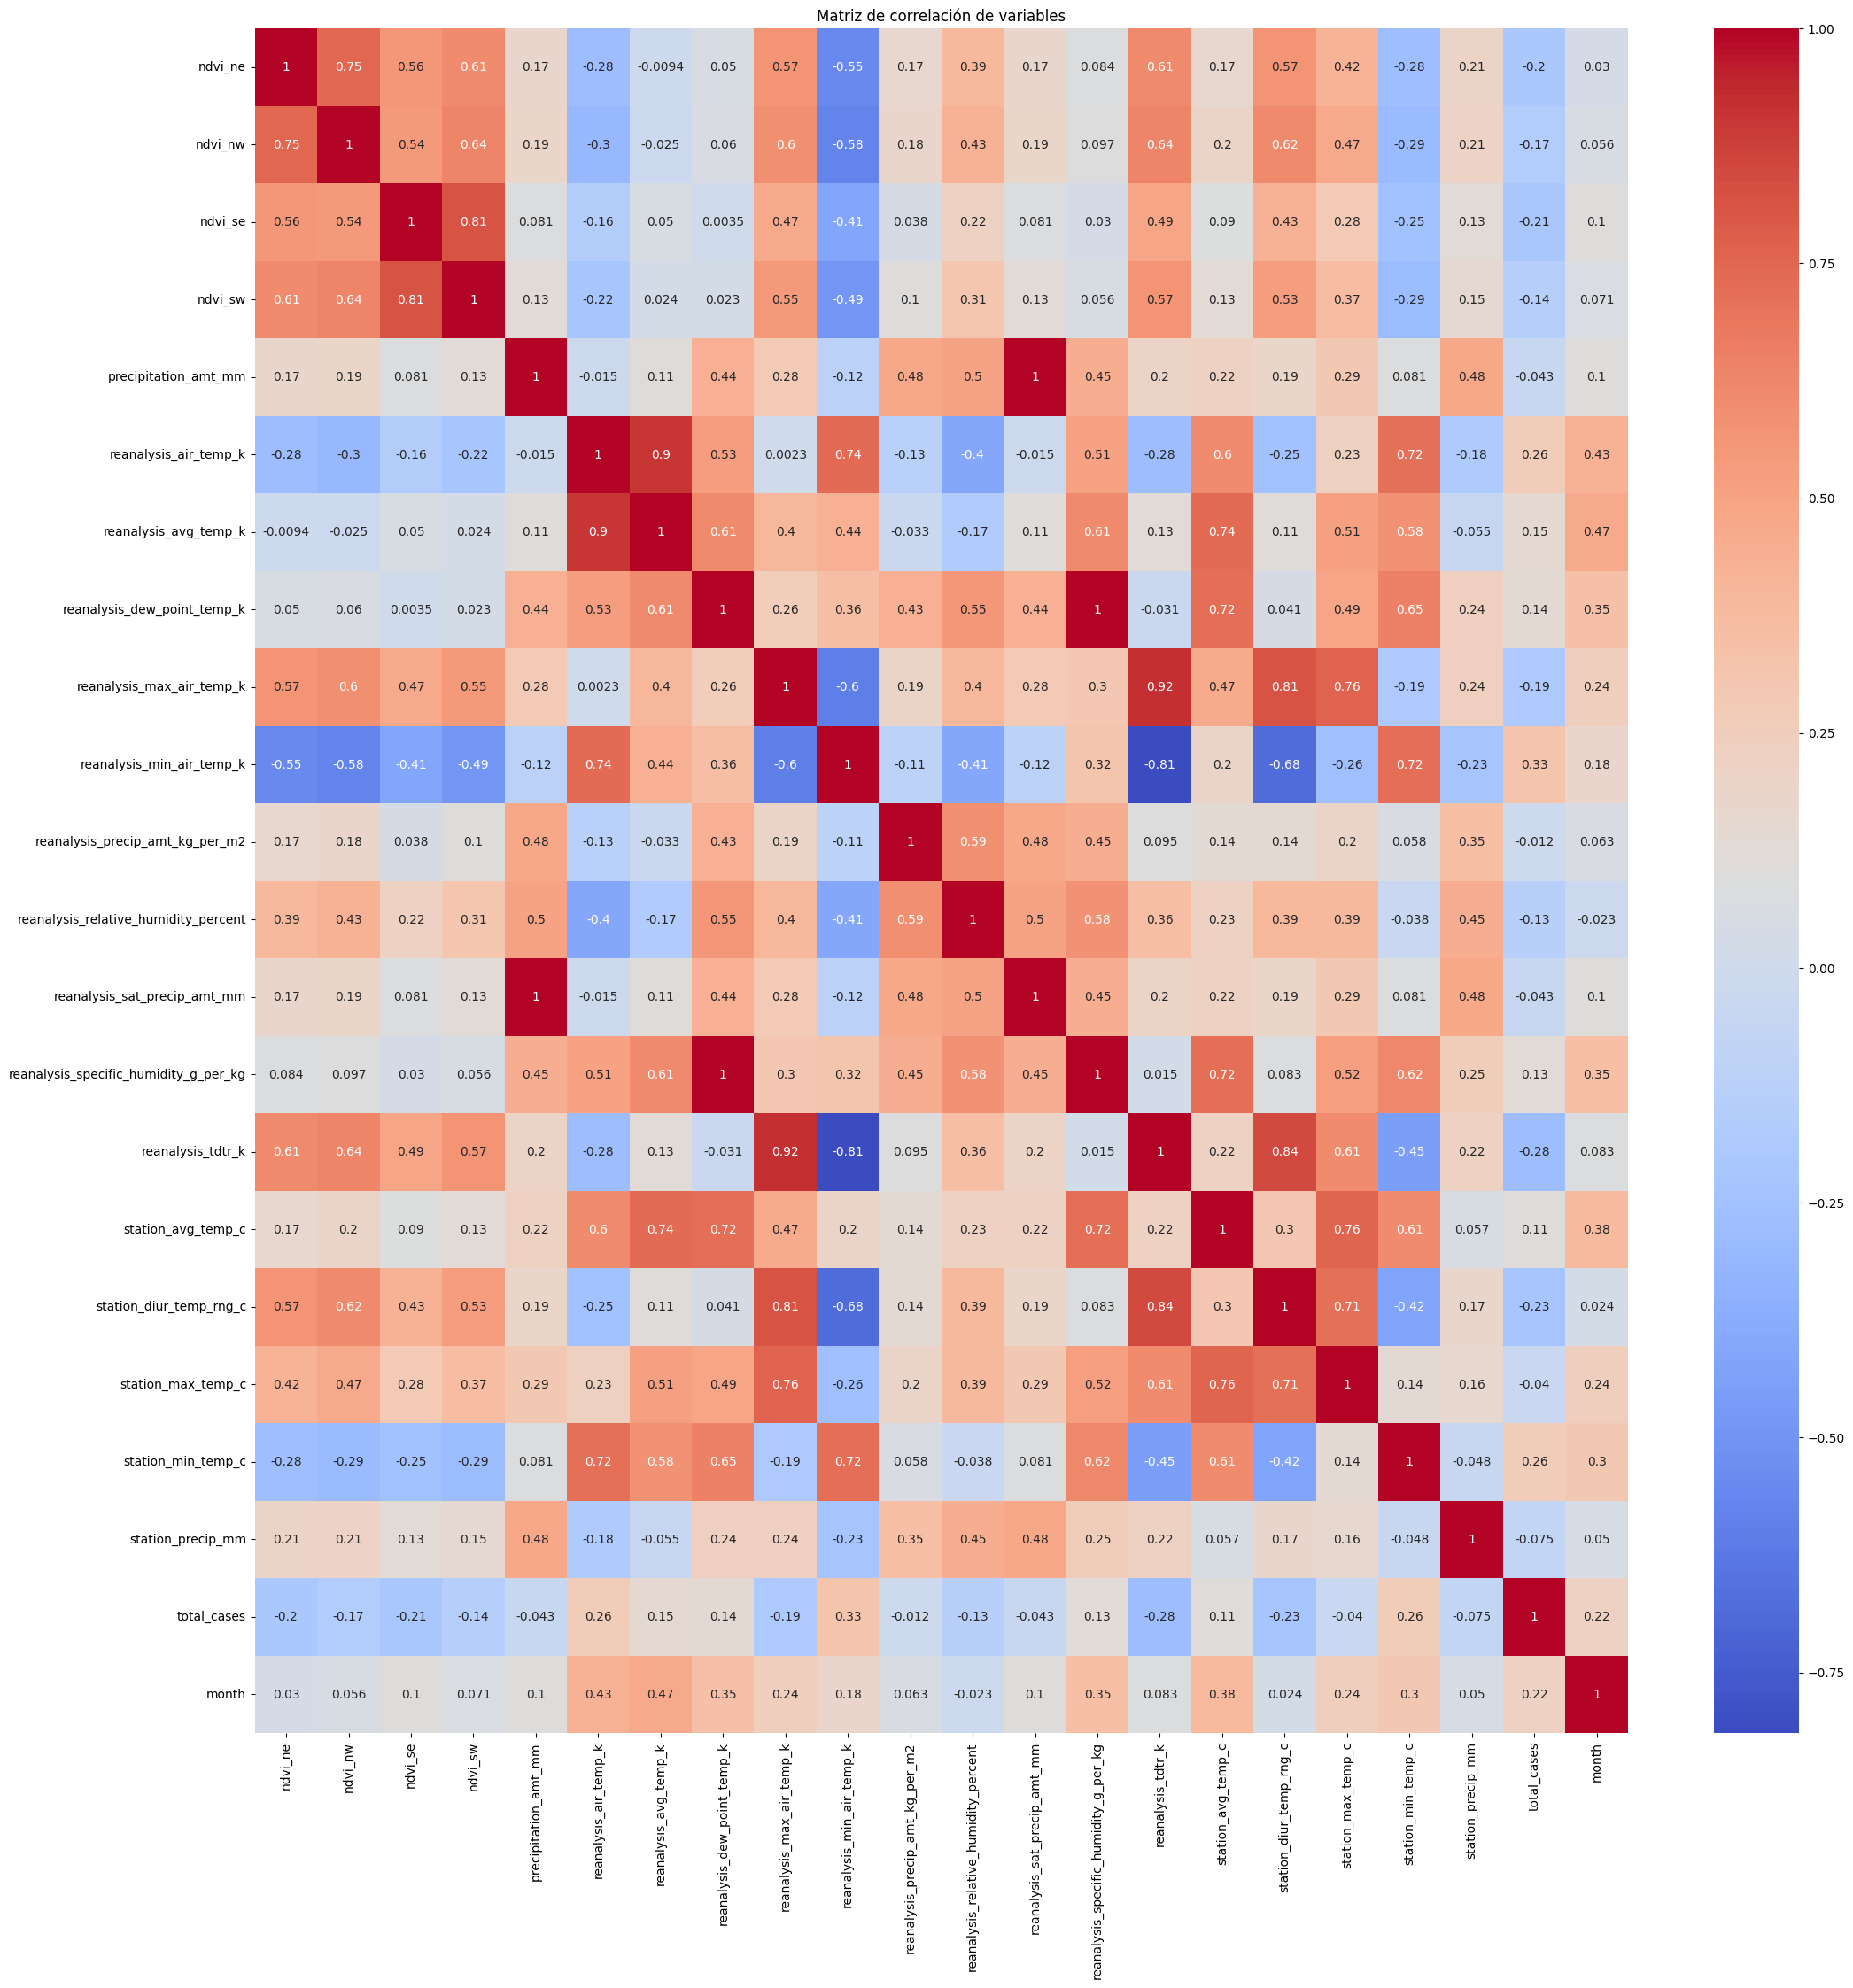

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

X_MatrizCorre = dengue_train.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1)

plt.figure(figsize=(25, 25))
corr = X_MatrizCorre.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación de variables")
plt.show()

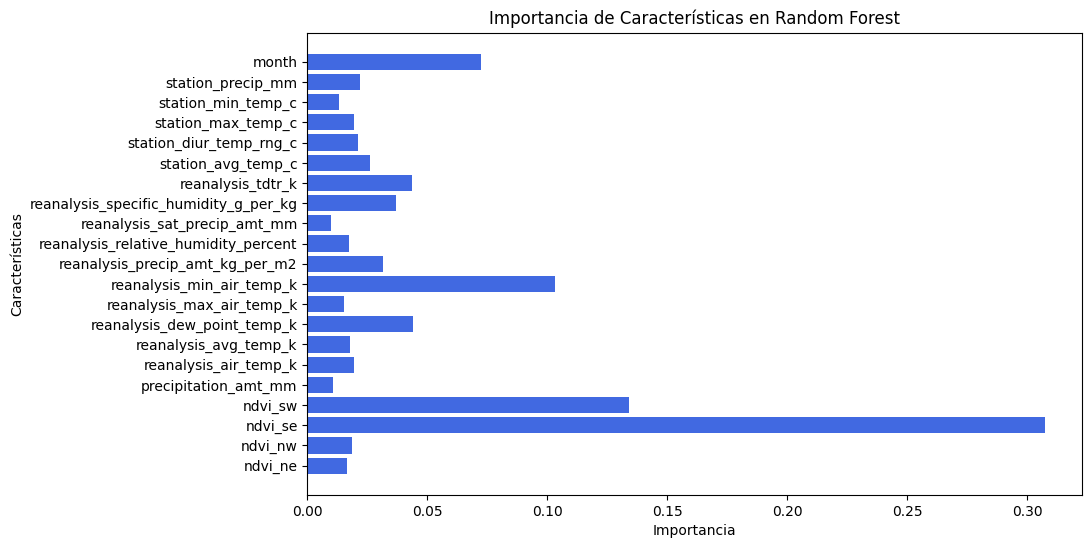

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Separar datos
X_Random = dengue_train.drop(columns=['city', 'year', 'weekofyear', 'total_cases', 'week_start_date'])
y_Random = dengue_train["total_cases"]

# Entrenar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_Random, y_Random)

# Importancia de características
importances = model.feature_importances_
features = X_Random.columns

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="royalblue")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características en Random Forest")
plt.show()


5.Además de la división de los datos de train y test, incorpora la utilización de datos de validación.

In [ ]:
from sklearn.model_selection import train_test_split

# ya se ha incoporado en la primera celda los datos de validacion cargados en la varable dengue_test

# Usar las características seleccionadas previamente con Mutual
X_selectedMutual = X[featuresMutual]

# Escalar las características a un rango entre 0 y 1
scaler = MinMaxScaler() # Crear un objeto MinMaxScaler
X_scaled = scaler.fit_transform(X_selectedMutual) # Aplicar la transformación

# Dividir en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42) # Usar X_scaled

6.Entrenamiento: Modelo 1° NaiveBayes - Desarrolla las diversas pruebas propuestas para la selección y justifica el criterio de calidad para la selección del modelo. Utiliza Cross Validation.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler # Importar MinMaxScaler

# Modelos de Naive Bayes a evaluar
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB()
}

# 🔹 Definir validación cruzada con 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Calcular la exactitud usando cross_val_score
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    #Generar predicciones "out-of-fold" para todo el dataset usando cross_val_predict
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)

    print(f"\nModelo: {name}")
    print("Exactitud promedio (CV): {:.4f}".format(scores.mean()))
    print("Reporte de clasificación:")
    print(classification_report(y_train, y_pred_cv, zero_division=0))


Modelo: GaussianNB
Exactitud promedio (CV): 0.0667
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.22      0.71      0.34        69
           1       0.15      0.27      0.20        48
           2       0.00      0.00      0.00        46
           3       0.07      0.02      0.03        47
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        52
           6       0.00      0.00      0.00        47
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        26
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00        22
          14       0.25      0.05      0.08        21
          15       0.05      0.07      0.06        15
   

7.Entrenamiento: Modelo 2° KNN - Desarrolla las diversas pruebas propuestas para la selección y justifica el criterio de calidad para la selección del modelo. Utiliza Cross Validation.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Usar KFold (sin estratificación) con 5 pliegues
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Instanciar el modelo KNN con 5 vecinos
best_model = KNeighborsClassifier(n_neighbors=3)

# Calcular la precisión utilizando cross_val_score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Precisión promedio (CV): {:.4f}".format(np.mean(cv_scores)))

# Generar predicciones "out-of-fold" usando cross_val_predict
y_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=cv)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_pred_cv)
print("Matriz de confusión (CV):")
print(cm)


Precisión promedio (CV): 0.0795
Matriz de confusión (CV):
[[40  9  8 ...  0  0  0]
 [12 16  2 ...  0  0  0]
 [15  7  4 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


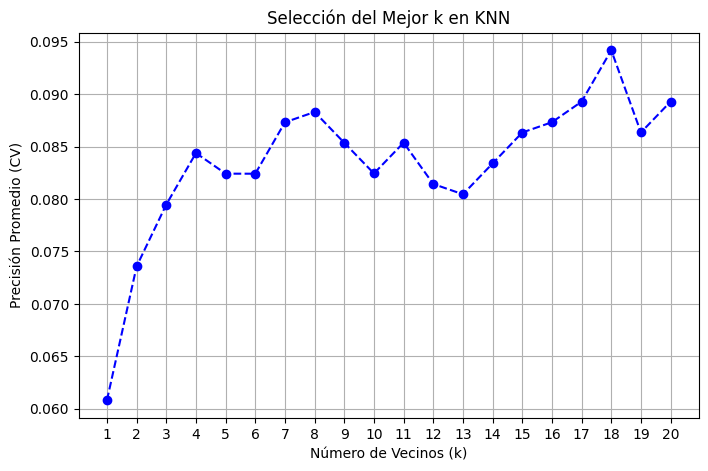

El mejor valor de k es: 18 con una precisión de 0.0942


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Definir el rango de valores de k a probar
k_values = range(1, 21)  # Probamos valores de k entre 1 y 20
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista para almacenar las puntuaciones de validación cruzada
accuracy_scores = []

# Evaluar cada valor de k usando validación cruzada
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')
    accuracy_scores.append(scores.mean())  # Promedio de la validación cruzada

# Graficar la precisión en función de k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Precisión Promedio (CV)")
plt.title("Selección del Mejor k en KNN")
plt.xticks(k_values)
plt.grid()
plt.show()

# Encontrar el mejor valor de k
best_k = k_values[np.argmax(accuracy_scores)]
print(f"El mejor valor de k es: {best_k} con una precisión de {max(accuracy_scores):.4f}")


8.Entrenamiento: Modelo 3° de elección libre - Desarrolla las diversas pruebas propuestas para la selección y justifica el criterio de calidad para la selección del modelo. Utiliza Cross Validation.

In [ ]:
# Suprime warnings innecesarios para limpiar la salida
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="Dask dataframe query planning is disabled")

import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor


# Convertir 'week_start_date' a datetime, ordenar cronológicamente y reindexar
dengue_train['week_start_date'] = pd.to_datetime(dengue_train['week_start_date'])
dengue_train.sort_values('week_start_date', inplace=True)
dengue_train.reset_index(drop=True, inplace=True)

# Imputar valores nulos usando ffill() para evitar warnings
dengue_train.ffill(inplace=True)

# ---------------------------
# 2. INGENIERÍA DE CARACTERÍSTICAS
# ---------------------------
# Extraer el mes y crear variables cíclicas para capturar la estacionalidad
dengue_train['month'] = dengue_train['week_start_date'].dt.month
dengue_train['week_sin'] = np.sin(2 * np.pi * dengue_train['weekofyear'] / 52)
dengue_train['week_cos'] = np.cos(2 * np.pi * dengue_train['weekofyear'] / 52)

# Agregar características de retardo (lag features) de la variable objetivo
# Esto puede ayudar a capturar la dependencia temporal en las series de casos
dengue_train['cases_lag1'] = dengue_train['total_cases'].shift(1)
dengue_train['cases_lag2'] = dengue_train['total_cases'].shift(2)
dengue_train['cases_roll_mean_3'] = dengue_train['total_cases'].rolling(window=3).mean()

# Eliminar las primeras filas que ahora tienen NaN por las transformaciones de lag
dengue_train.dropna(inplace=True)

# ---------------------------
# 3. DEFINICIÓN DE VARIABLES PREDICTORAS Y TARGET
# ---------------------------
# Se incluyen las variables originales, las variables temporales y las de retardo
features = [
    'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
    'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
    'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
    'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c',
    'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm',
    'month', 'week_sin', 'week_cos',
    'cases_lag1', 'cases_lag2', 'cases_roll_mean_3'
]

X = dengue_train[features]
y = dengue_train['total_cases']

# ---------------------------
# 4. DIVISIÓN TEMPORAL DE LOS DATOS
# ---------------------------
# Se utiliza el 80% de los datos (los más antiguos) para entrenamiento
# y el 20% restante para validación, respetando la secuencia temporal
split_index = int(len(dengue_train) * 0.8)
X_train = X.iloc[:split_index].copy()
y_train = y.iloc[:split_index].copy()
X_val   = X.iloc[split_index:].copy()
y_val   = y.iloc[split_index:].copy()
# Lista para guardar las predicciones
predictions = []

best_lgbm = LGBMRegressor(
    colsample_bytree=1.0,
    learning_rate=0.01,
    max_depth=10,
    n_estimators=300,
    subsample=0.7,
    random_state=42
)
# 🔹 Crear un pipeline con preprocesamiento + modelo entrenado
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputar valores nulos con la mediana
    ('scaler', StandardScaler()),  # Escalar las características
    ('lgbm', best_lgbm)  # Modelo optimizado
])

# Procesar por cada ciudad
for city in dengue_train['city'].unique():
    # Filtrar datos de la ciudad
    train_city = dengue_train[dengue_train['city'] == city]
    test_city = dengue_test[dengue_test['city'] == city]

    # Variables predictoras y target
    X = train_city[featuresMutual]
    y = train_city['total_cases']
    X_test = test_city[featuresMutual]

    # División en entrenamiento y validación (por ejemplo, 80/20)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar el modelo
    pipeline.fit(X_train, y_train)

    # 🔹 Hacer predicciones en el conjunto de validación
    y_pred_val = pipeline.predict(X_test)



    # Predecir en el conjunto de prueba
    y_test_pred = pipeline.predict(X_test)
    # Redondear a enteros ya que total_cases debe ser entero
    y_test_pred = [int(round(x)) for x in y_test_pred]

    # Agregar la columna de predicciones al DataFrame test para la ciudad
    test_city = test_city.copy()  # Para evitar advertencias de SettingWithCopyWarning
    test_city['total_cases'] = y_test_pred

    predictions.append(test_city[['city', 'year', 'weekofyear', 'total_cases']])

# Concatenar las predicciones de ambas ciudades y guardar el CSV de envío
submission = pd.concat(predictions)
submission.to_csv('submission.csv', index=False)


In [ ]:


from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>